<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/Radiation_Analysis(Best_Updated).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the first Excel file:


Saving Book2.xlsx to Book2 (1).xlsx
Upload the second Excel file:


Saving Book3.xlsx to Book3 (1).xlsx


<ipython-input-1-a03df1d4aeee>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("H").mean()
<ipython-input-1-a03df1d4aeee>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample("H").mean()


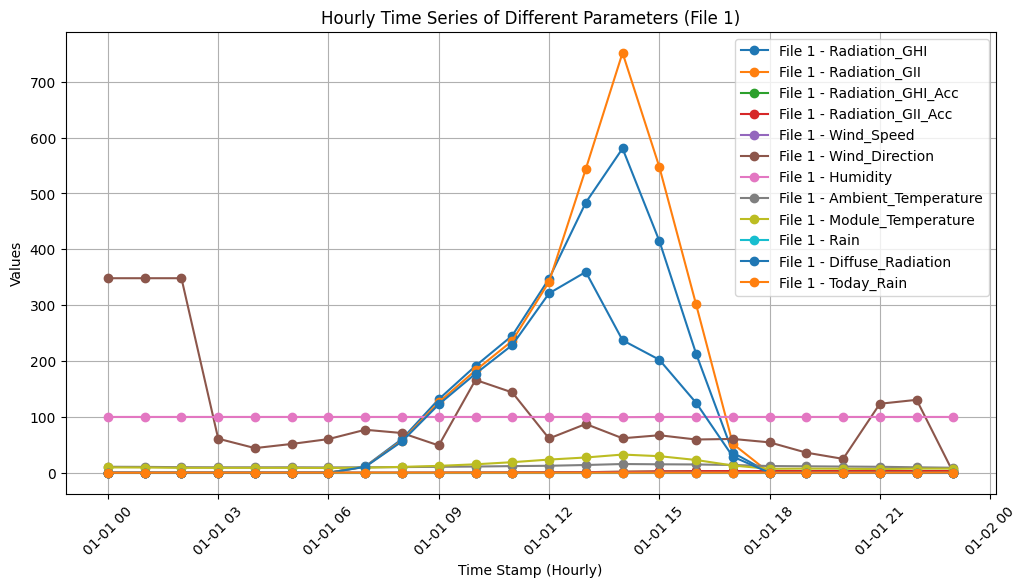

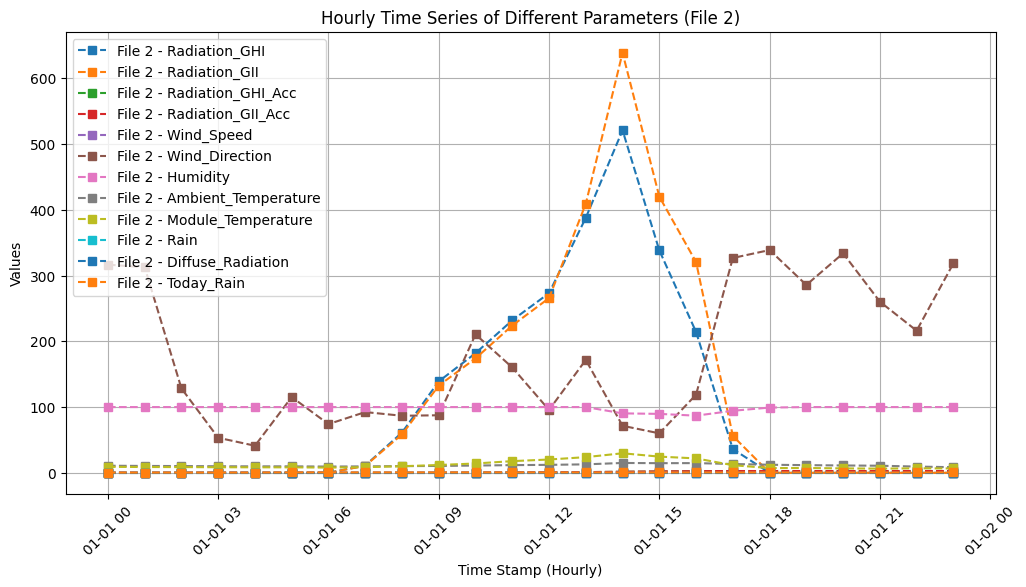

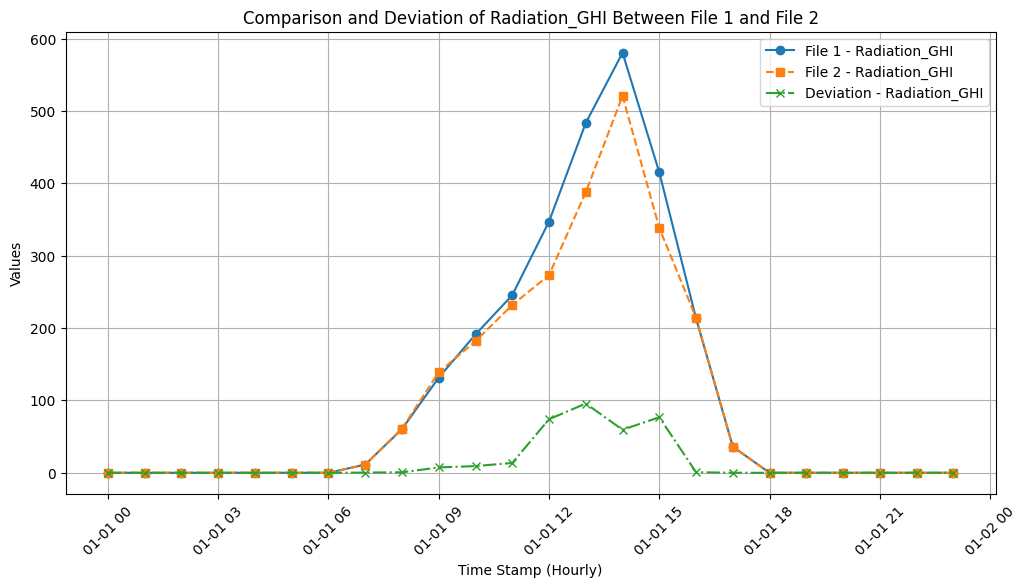

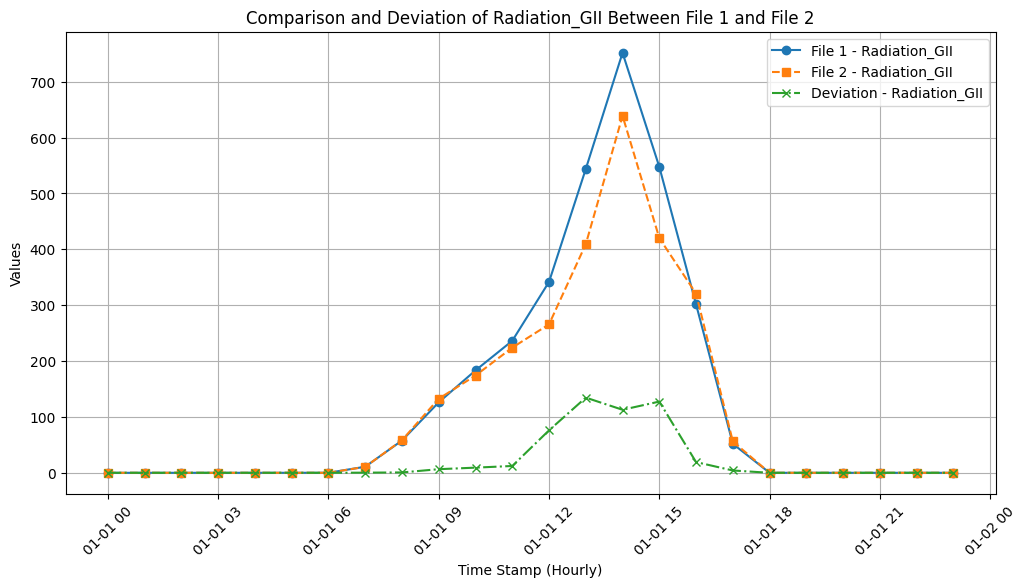

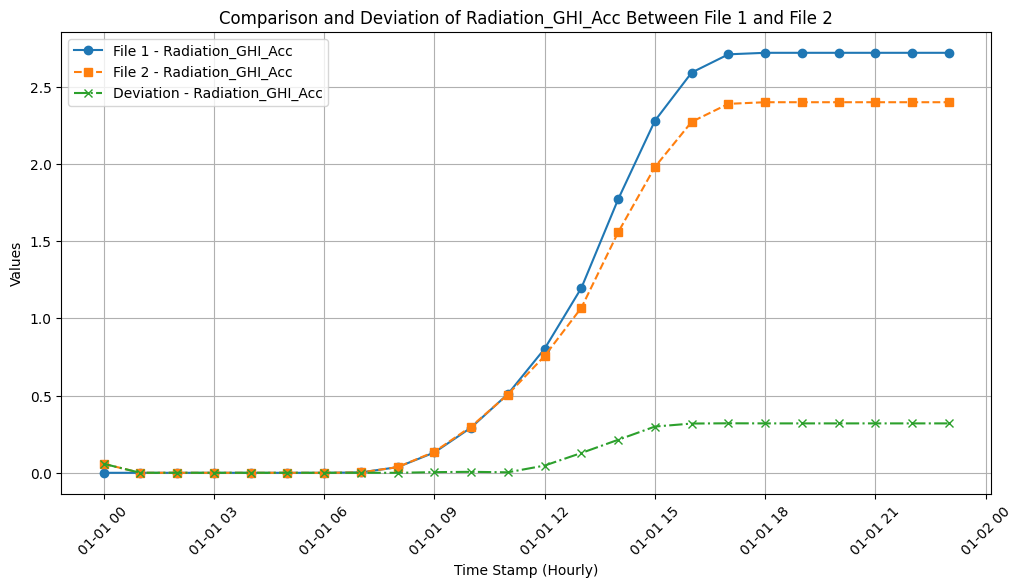

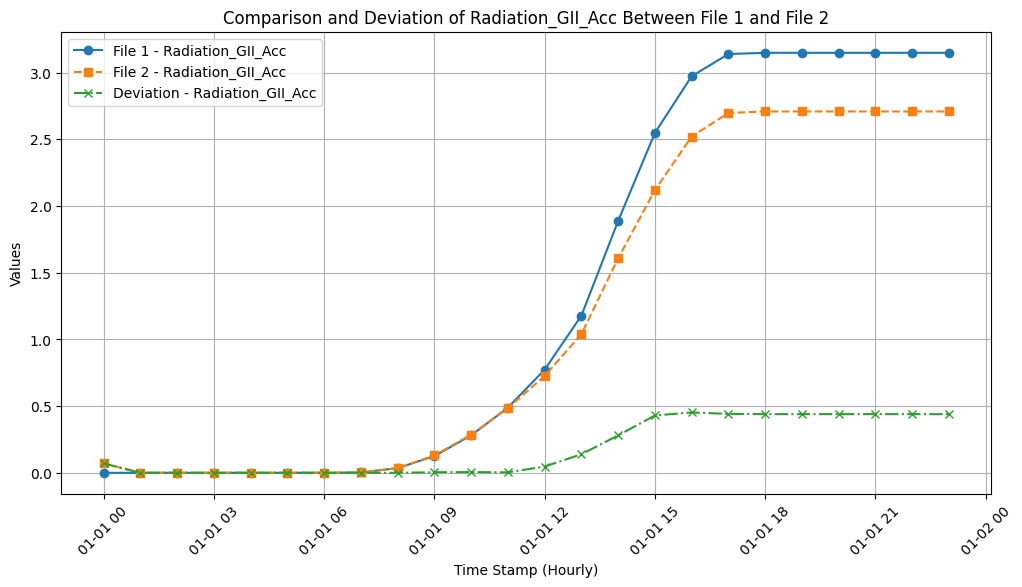

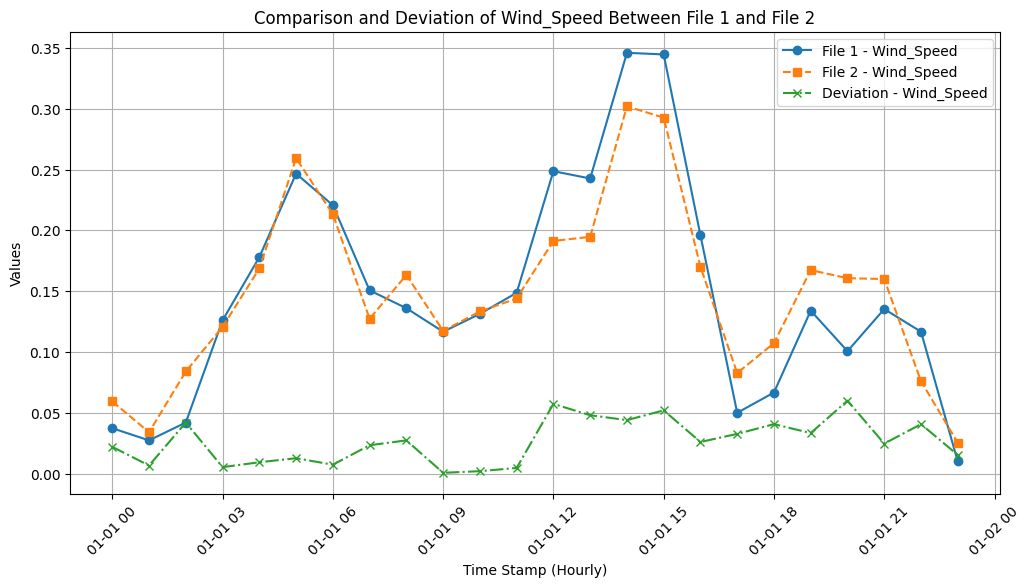

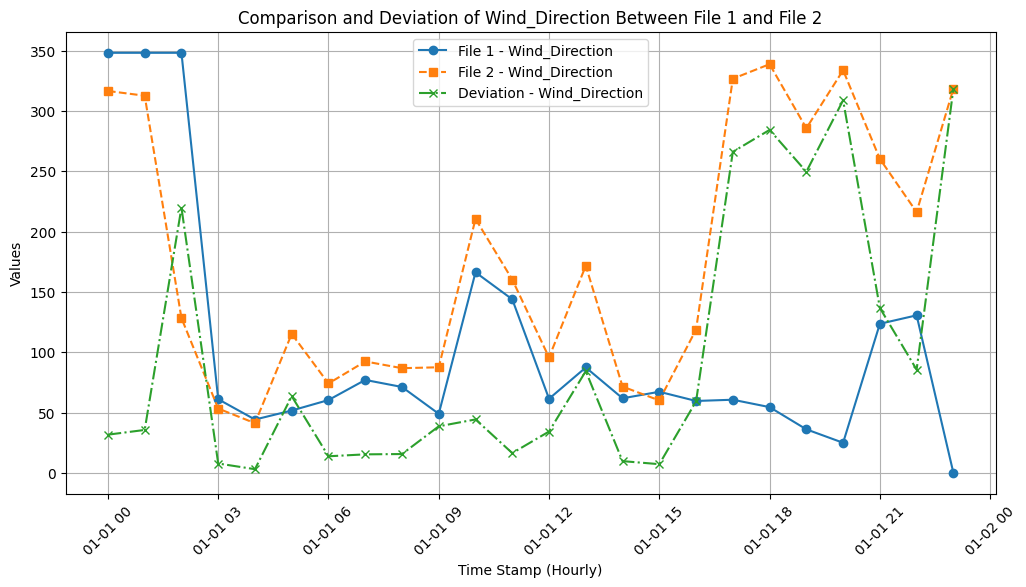

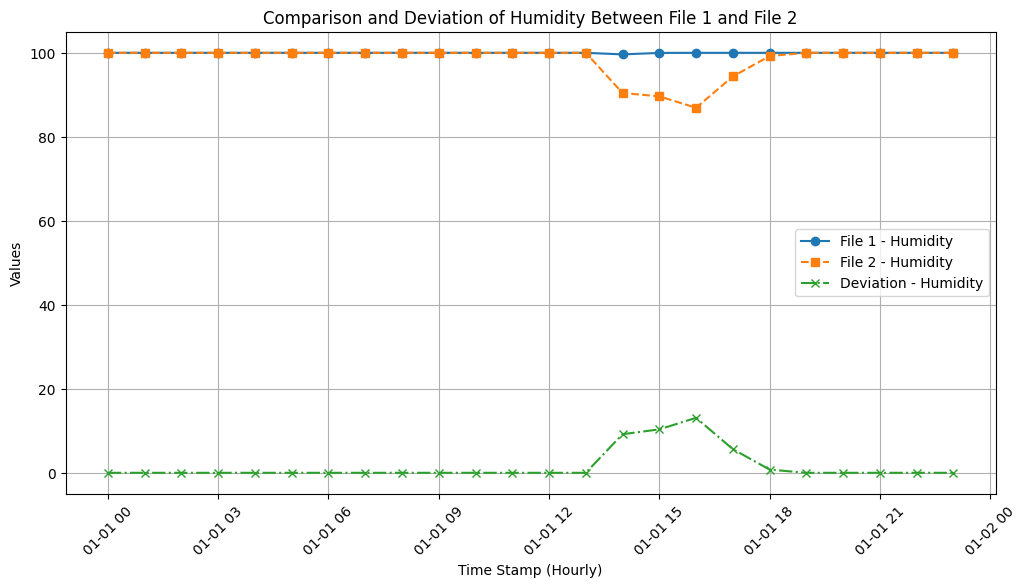

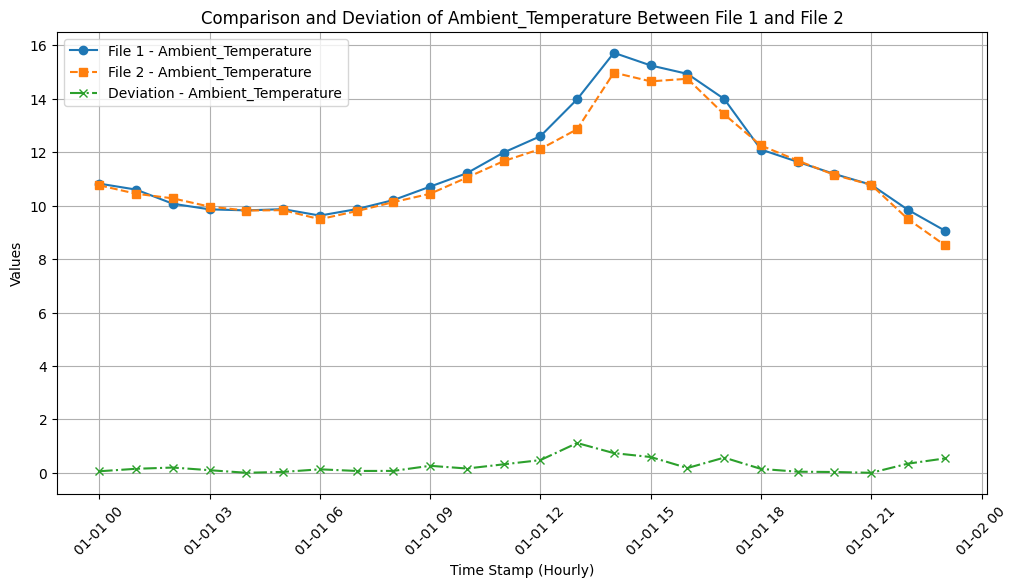

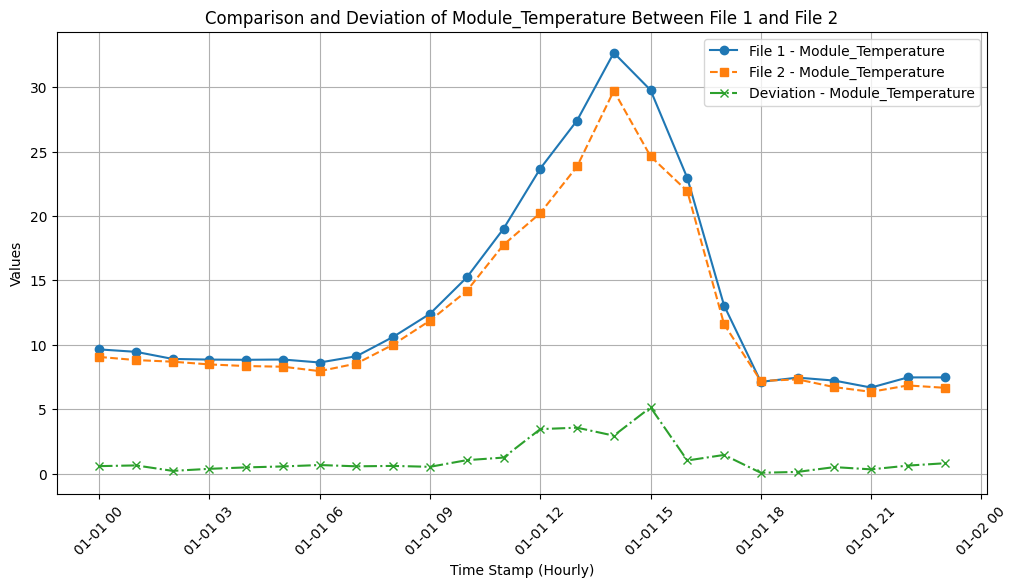

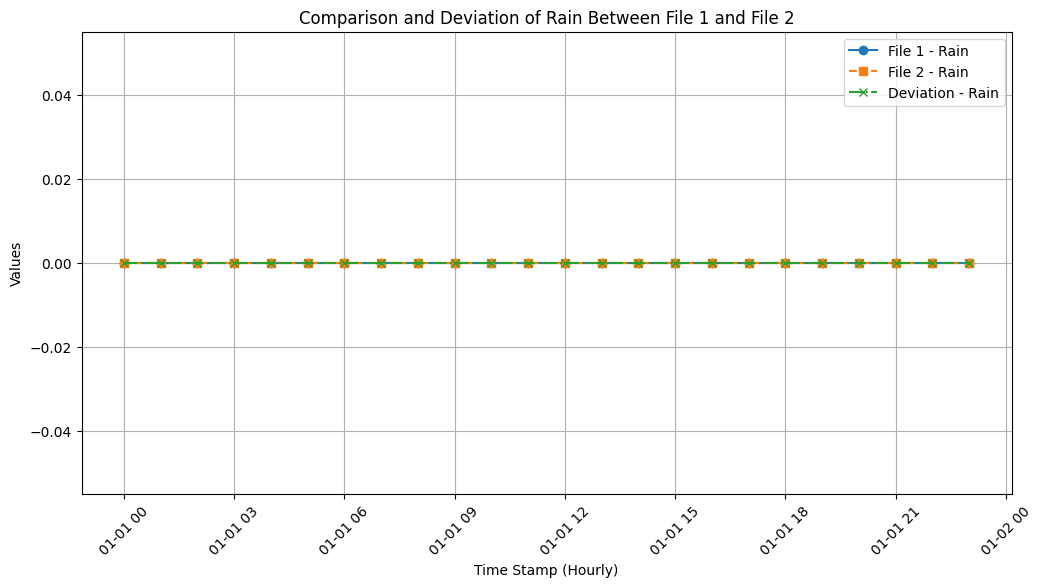

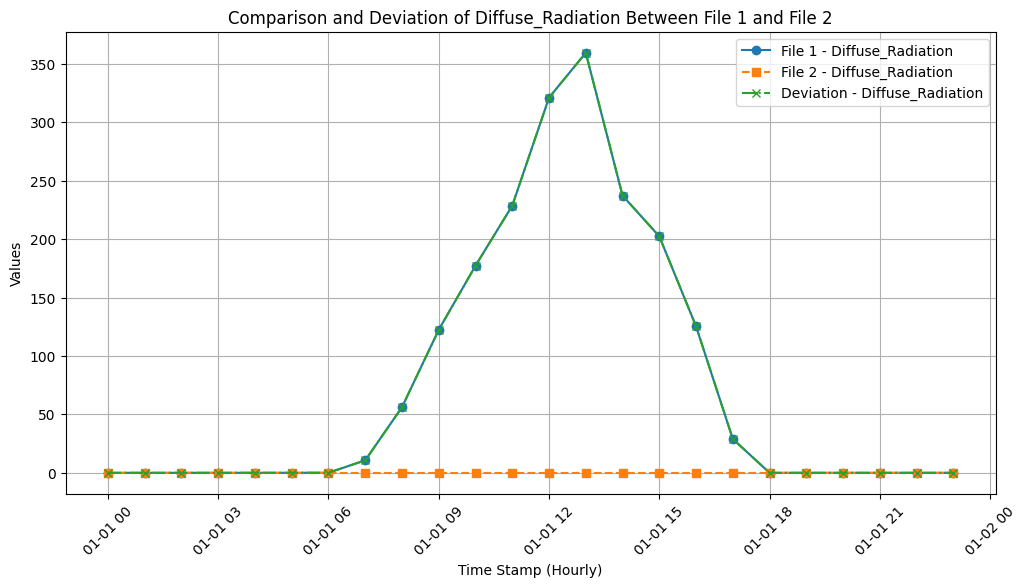

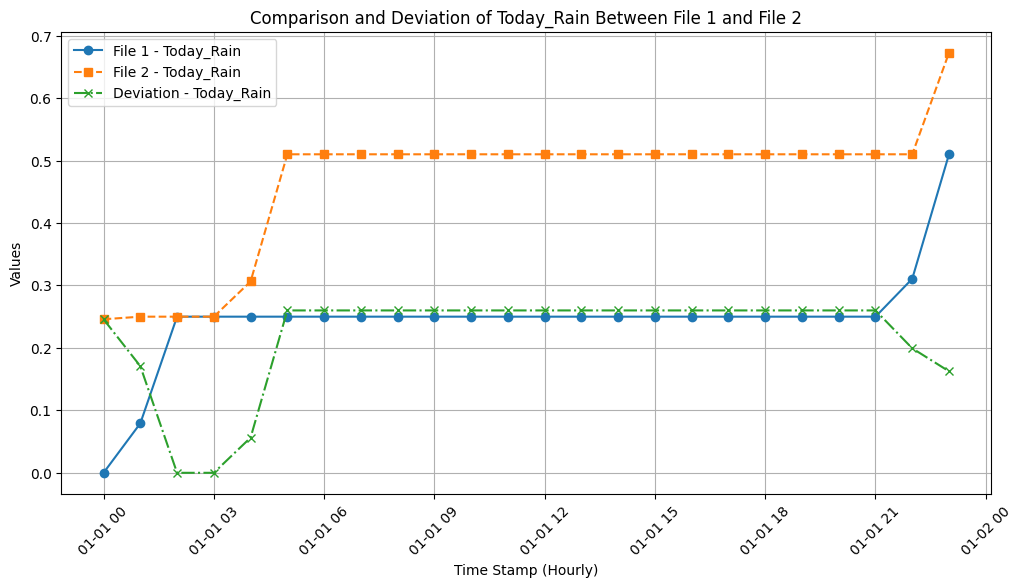

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload two files
print("Upload the first Excel file:")
file1 = files.upload()
print("Upload the second Excel file:")
file2 = files.upload()

# Load the Excel files
file1_path = list(file1.keys())[0]
file2_path = list(file2.keys())[0]

df1 = pd.read_excel('/content/Book2.xlsx')
df2 = pd.read_excel('/content/Book3.xlsx')

# Rename columns for consistency
def rename_columns(df):
    df.columns = ["Time_Stamp", "Radiation_GHI", "Radiation_GII", "Radiation_GHI_Acc",
                  "Radiation_GII_Acc", "Wind_Speed", "Wind_Direction", "Humidity",
                  "Ambient_Temperature", "Module_Temperature", "Rain",
                  "Diffuse_Radiation", "Today_Rain"]
    return df

df1 = rename_columns(df1)
df2 = rename_columns(df2)

# Convert Time_Stamp to datetime
def preprocess(df):
    df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")
    numeric_columns = df.columns[1:]  # Exclude Time_Stamp
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    df = df.dropna(subset=["Time_Stamp"])
    df.set_index("Time_Stamp", inplace=True)
    df_resampled = df.resample("H").mean()
    return df_resampled, numeric_columns

df1_resampled, numeric_columns1 = preprocess(df1)
df2_resampled, numeric_columns2 = preprocess(df2)

# Plot the first dataset separately
plt.figure(figsize=(12, 6))
for col in numeric_columns1:
    plt.plot(df1_resampled.index, df1_resampled[col], label=f"File 1 - {col}", marker='o', linestyle="-")
plt.xlabel("Time Stamp (Hourly)")
plt.ylabel("Values")
plt.title("Hourly Time Series of Different Parameters (File 1)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot the second dataset separately
plt.figure(figsize=(12, 6))
for col in numeric_columns2:
    plt.plot(df2_resampled.index, df2_resampled[col], label=f"File 2 - {col}", marker='s', linestyle="--")
plt.xlabel("Time Stamp (Hourly)")
plt.ylabel("Values")
plt.title("Hourly Time Series of Different Parameters (File 2)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Compute deviation
df_deviation = abs(df1_resampled - df2_resampled)

# Plot deviation graphs separately for each column with comparison
for col in df_deviation.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df1_resampled.index, df1_resampled[col], label=f"File 1 - {col}", marker='o', linestyle="-")
    plt.plot(df2_resampled.index, df2_resampled[col], label=f"File 2 - {col}", marker='s', linestyle="--")
    plt.plot(df_deviation.index, df_deviation[col], label=f"Deviation - {col}", marker='x', linestyle="-." )
    plt.xlabel("Time Stamp (Hourly)")
    plt.ylabel("Values")
    plt.title(f"Comparison and Deviation of {col} Between File 1 and File 2")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()
